$$
F_y(t) = \frac{3\pi mg}{4\beta(3+q)}(cos\frac{\pi t}{\beta T}
                                    -qcos\frac{3\pi t}{\beta T}+
                                    pcos\frac{2\pi t}{\beta T})
$$

离散化$t[n] = \frac{\beta T}{f_s} n- 0.5\beta T$, $n=0,1,2,...100, f_s=100$

压力曲线归一化离散化模型如图所示（不考虑$\frac{3\pi mg}{4\beta}$放缩系数）

$$
F_y[n] = \frac{1}{(3+q)}(sin\frac{\pi n}{f_s}
                                    +qsin\frac{3\pi n}{f_s}
                                    -psin\frac{2\pi n}{f_s})
$$


beta = 0.5
q = 0.5
-1.0 <= p <= 1.0
(100,)


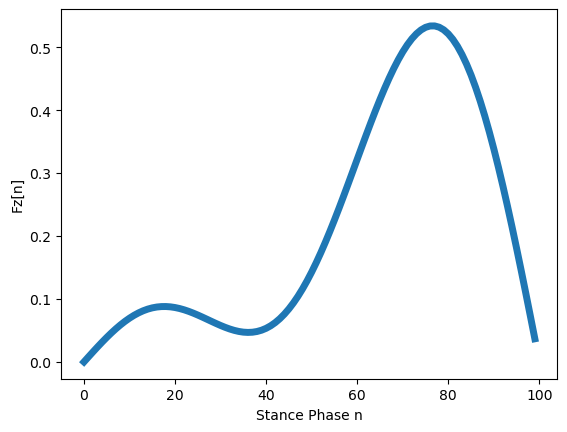

In [199]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

beta = 0.5
q_a = 0.5
print('beta =',beta)
print('q =', q_a)
print(-2*np.sqrt(q_a*(1-q_a)), "<= p <=", 2*np.sqrt(q_a*(1-q_a)))
p_a = 0.8

n = np.arange(0,100)
fs = 100
print(np.shape(n))
pi = np.pi

f_act = 1/(3+q_a)*(np.sin(pi/fs*n)+
                   q_a*(np.sin(3*pi/fs*n))-
                   p_a*(np.sin(2*pi/fs*n)))
fhori_act = 1/(3+q_a)*()
plt.plot(n, f_act, linewidth=5)
plt.xlabel('Stance Phase n')
plt.ylabel('Fz[n]')
plt.show()

已知$\beta$,求 $\theta = [p,q]$

实际信号归一化后格式为
\begin{aligned}
x[n] =& \frac{1}{(3+q)}(sin\frac{\pi n}{f_s}
                                    +qsin\frac{3\pi n}{f_s}
                                    -psin\frac{2\pi n}{f_s})+w[n],\\
     =& s(n;\theta)+w[n] \quad n=0,1,...,100
\end{aligned}

首先尝试通过CRLB(CR Lower Bound)求MVU(Minimum Variance Unbiased Estimator)

其中$w$为白噪声，样本独立且服从$w[n] \sim N(\mu,\sigma^2)$的高斯分布,易证信号关于$\theta$的似然为
\begin{aligned}
p(x;\theta) = \frac{1}{(2\pi\alpha^2)^{N/2}}exp
\left\{ 
     -\frac{1}{2\alpha^2}\sum_{n=0}^{100}(x[n]-s(n;\theta))^2
\right\}
\end{aligned}

对每个模型参数求偏导数$\frac{\partial ln p}{\partial \theta}$

\begin{aligned}
\frac{\partial ln p(x;\theta)}{\partial \theta} = -\frac{1}{2\sigma^2}
\frac{\partial }{\partial \theta}
\left\{
     \sum_{n=0}^{100}(x[n]-s(n;\theta))^2
\right\} 
\end{aligned}

下面用$s_{kn}=sin\frac{k\pi n}{f_s}$简化表达


In [174]:
from sympy import *
xn = symbols('x_n')
s1n = symbols('s_1n')
s2n = symbols('s_2n')
s3n = symbols('s_3n')
p = symbols('p')
q = symbols('q')
lnp = (xn-1/(3+q)*(s1n+q*s3n-p*s2n))**2
print('lnp = ')
pprint(lnp)
print()


print('dlnp_dp = ')
dlnpdp = diff(lnp, p)
pprint(dlnpdp)
print()

print('dlnp_dq = ')
dlnpdq = diff(lnp, q)
pprint(dlnpdq)
print()



lnp = 
                           2
⎛     -p⋅s₂ₙ + q⋅s₃ₙ + s₁ₙ⎞ 
⎜xₙ - ────────────────────⎟ 
⎝            q + 3        ⎠ 

dlnp_dp = 
      ⎛     -p⋅s₂ₙ + q⋅s₃ₙ + s₁ₙ⎞
2⋅s₂ₙ⋅⎜xₙ - ────────────────────⎟
      ⎝            q + 3        ⎠
─────────────────────────────────
              q + 3              

dlnp_dq = 
⎛     -p⋅s₂ₙ + q⋅s₃ₙ + s₁ₙ⎞ ⎛  2⋅s₃ₙ   2⋅(-p⋅s₂ₙ + q⋅s₃ₙ + s₁ₙ)⎞
⎜xₙ - ────────────────────⎟⋅⎜- ───── + ────────────────────────⎟
⎝            q + 3        ⎠ ⎜  q + 3                  2        ⎟
                            ⎝                  (q + 3)         ⎠



\begin{aligned}
\frac{\partial ln p(x;\theta)}{\partial p}=
-\frac{1}{2\sigma^2}
\sum_{n=0}^{100}(\frac{2s_{2n}x[n]}{(q+3)}+\frac{2s_{2n}(ps_{2n}-qs_{3n}-s_{1n})}{(q+3)^2})
\end{aligned}

\begin{aligned}
\frac{\partial ln p(x;\theta)}{\partial q}=-\frac{1}{2\sigma^2}
\sum_{n=0}^{100}(-\frac{2s_{3n}x[n]}{(q+3)}-
                \frac{2(s_{3n}+x[n])(ps_{2n}-qs_{3n}-s_{1n})}{(q+3)^2}-
                \frac{2(ps_{2n}-qs_{3n}-s_{1n})^2}{(q+3)^3})
\end{aligned}



In [175]:
from sympy import symbols, diff, pprint
xn = symbols('x_n')
s1n = symbols('s_1n')
s2n = symbols('s_2n')
s3n = symbols('s_3n')
p = symbols('p')
q = symbols('q')
exp1 = M = p*s2n-q*s3n-s1n
exp2 = q+3
dlnpdp = 2*s2n*xn/(exp2)+(2*s2n*M)/(exp2**2)
dlnpdq = -2*s2n*xn/(exp2)-2*(s3n+xn)*M/(exp2**2)-2*M**2/(exp2**3)

dlnpddp = diff(dlnpdp, p)
dlnpdpq = diff(dlnpdp, q)
dlnpddq = diff(dlnpdq, q)
dlnpdqp = diff(dlnpdq, p)

print("dlnpddp = ")
pprint(dlnpddp)
print()

print("dlnpddq = ")
pprint(dlnpddq)
print()

print("dlnpdpq = ")
pprint(dlnpdpq)
print()


dlnpddp = 
      2 
 2⋅s₂ₙ  
────────
       2
(q + 3) 

dlnpddq = 
                                                                              
2⋅s₂ₙ⋅xₙ   s₃ₙ⋅(2⋅s₃ₙ + 2⋅xₙ)   4⋅s₃ₙ⋅(p⋅s₂ₙ - q⋅s₃ₙ - s₁ₙ)   2⋅(2⋅s₃ₙ + 2⋅xₙ)
──────── + ────────────────── + ─────────────────────────── + ────────────────
       2               2                         3                            
(q + 3)         (q + 3)                   (q + 3)                            (

                                                2
⋅(p⋅s₂ₙ - q⋅s₃ₙ - s₁ₙ)   6⋅(p⋅s₂ₙ - q⋅s₃ₙ - s₁ₙ) 
────────────────────── + ────────────────────────
      3                                 4        
q + 3)                           (q + 3)         

dlnpdpq = 
  2⋅s₂ₙ⋅s₃ₙ   2⋅s₂ₙ⋅xₙ   4⋅s₂ₙ⋅(p⋅s₂ₙ - q⋅s₃ₙ - s₁ₙ)
- ───────── - ──────── - ───────────────────────────
          2          2                    3         
   (q + 3)    (q + 3)              (q + 3)          



\begin{aligned}
\frac{\partial^2 ln p(x;\theta)}{\partial p^2} = 
-\frac{1}{2\sigma^2}\sum_{n=0}^{100}\frac{2s_{2n}^2}{(q+3)^2}
\end{aligned}

\begin{aligned}
\frac{\partial^2 ln p(x;\theta)}{\partial q^2} = 
-\frac{1}{2\sigma^2}\sum_{n=0}^{100} (
    \frac{2s_{3n}^2+2x[n](s_{2n}+s_{3n})}{(q+3)^2}+
    \frac{(8s_{3n}+4x[n])M}{(q+3)^3}+\frac{6M^2}{(q+3)^4}
)
\end{aligned}

\begin{aligned}
\frac{\partial^2 ln p(x;\theta)}{\partial p \partial q} = -\frac{1}{2\sigma^2}\sum_{n=0}^{100} 
(
    -\frac{2s_{2n}(x[n]+s_{3n})}{(q+3)^2}-\frac{4s_{2n}M}{(q+3)^3}
)
\end{aligned}

其中 $M = ps_{2n}-qs_{3n}-s_{1n}$



$$
\begin{bmatrix}
\frac{\partial ln p(x;\theta)}{\partial p} \\
\frac{\partial ln p(x;\theta)}{\partial q}
\end{bmatrix} = 
\begin{bmatrix}
-E(\frac{\partial^2 ln p(x;\theta)}{\partial p^2}) & -E(\frac{\partial^2 ln p(x;\theta)}{\partial p \partial q} ) \\
-E(\frac{\partial^2 ln p(x;\theta)}{\partial p \partial q} ) & -E(\frac{\partial^2 ln p(x;\theta)}{\partial q^2} )
\end{bmatrix}
\begin{bmatrix}
\hat{p}-p \\
\hat{q}-q
\end{bmatrix}
$$


使用二元一次方程组通解可以得到
\begin{aligned}
I_{11}\hat{p} + I_{12}\hat{q} =& \frac{\partial ln p(x;\theta)}{\partial p}-I_{11}p-I_{12}q = b_1 \\
I_{12}\hat{p} + I_{22}\hat{q} =& \frac{\partial ln p(x;\theta)}{\partial q}-I_{12}p-I_{22}q = b_2\\ 
\hat{p} =& (I_{12}b_2-I_{22}b_1)/(I_{12}I_{12}-I_{11}I_{22})\\
\hat{q} =& (I_{11}b_2-I_{12}b_1)/(I_{11}I_{22}-I_{12}I_{12})
\end{aligned}


由于包含了许多求和项，该表达式比较复杂，因此考虑最大似然解，一般来说N趋于无穷大时，最大似然解可以有效估计参数

\begin{aligned}
\frac{\partial ln p(x;\theta)}{\partial p}=
-\frac{1}{2\sigma^2}
\sum_{n=0}^{100}(\frac{2s_{2n}x[n]}{(q+3)}+\frac{2s_{2n}(ps_{2n}-qs_{3n}-s_{1n})}{(q+3)^2}) = 0
\end{aligned}

\begin{aligned}
\frac{\partial ln p(x;\theta)}{\partial q}=-\frac{1}{2\sigma^2}
\sum_{n=0}^{100}(-\frac{2s_{3n}x[n]}{(q+3)}-
                \frac{2(s_{3n}+x[n])(ps_{2n}-qs_{3n}-s_{1n})}{(q+3)^2}-
                \frac{2(ps_{2n}-qs_{3n}-s_{1n})^2}{(q+3)^3})=0
\end{aligned}

对信号使用离散时间傅立叶变换(DTFT)
$$
F_y[n] = \frac{1}{(3+q)}(sin\frac{\pi n}{f_s}
                                    +qsin\frac{3\pi n}{f_s}
                                    -psin\frac{2\pi n}{f_s})
$$
$$
X(e^{jw}) = \frac{1}{(3+q)}\frac{\pi}{j}\sum_{l=-\inf}^{\inf}[
    \delta(w-w_1-2\pi l)-\delta(w+w_1-2\pi l)+
    q\delta(w-w_3-2\pi l)-q\delta(w+w_3-2\pi l)-
    p\delta(w-w_2-2\pi l)-p\delta(w+w_2-2\pi l)
]
$$


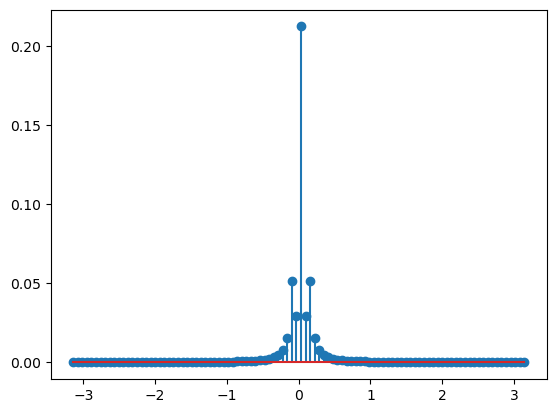

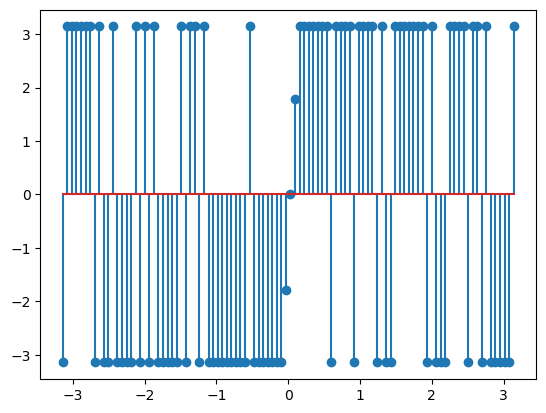

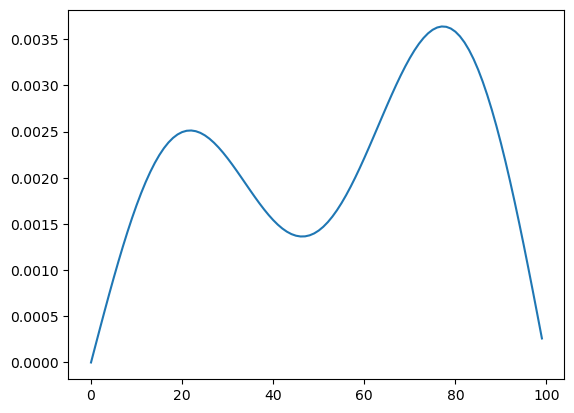

In [193]:
fft = np.fft.fft(f_act)
fft=np.fft.fftshift(fft)/np.shape(fft)[0]
amp = np.abs(fft)
phase = np.angle(fft)
w = np.linspace(-np.pi, np.pi, len(fft))
plt.stem(w, amp,use_line_collection=True)
plt.show()
plt.stem(w, phase,use_line_collection=True)
plt.show()
f_rec = np.fft.ifft(fft)
plt.plot(n, np.abs(f_rec))
plt.show()